## Import Packages

In [1]:
# import packages
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE

## Load Data

In [2]:
# SNPs dataset
df_snp=pd.read_csv("./ceph_hgdp_minor_code_XNA.betterAnnotated.csv")

In [3]:
df_snp.head(10)

,snp,chr,pos,HGDP00448,HGDP00479,HGDP00985,HGDP01094,HGDP00982,HGDP00911,HGDP01202,...,HGDP01342,HGDP00824,HGDP01319,HGDP01357,HGDP00549,HGDP00953,HGDP01070,HGDP01376,HGDP00671,HGDP01024
0,rs10000929,4,131516474,1,0,0,1,1,0,1,...,1,0,1,0,0,2,0,0,0,2
1,rs10002472,4,159087423,2,1,2,2,0,2,2,...,2,2,2,1,2,1,1,2,0,2
2,rs10005550,4,128697858,2,2,2,2,1,0,1,...,2,2,2,1,2,2,2,2,1,2
3,rs10007576,4,59063992,2,0,2,1,2,2,2,...,2,1,2,1,2,2,1,1,1,0
4,rs10007998,4,35988597,0,0,0,0,0,0,0,...,2,1,2,0,2,0,1,2,2,1
5,rs10010285,4,35687757,0,1,0,0,0,1,1,...,0,1,0,1,2,0,1,0,2,0
6,rs1001049,15,92483439,1,0,0,0,0,0,0,...,0,0,0,2,0,0,0,2,1,0
7,rs10011134,4,21256030,1,1,2,2,1,2,2,...,0,0,1,2,1,1,2,2,2,0
8,rs10012310,4,147608619,2,2,2,1,2,2,2,...,2,2,2,0,2,2,2,2,0,2
9,rs10013379,4,21116372,2,2,2,1,2,1,0,...,2,1,2,2,1,2,2,2,2,2


In [4]:
# sample information
df_info=pd.read_csv("./ceph_hgdp_minor_code_XNA.sampleInformation.csv")

In [5]:
df_info.head(10)

,ID,Gender,Population,Geographic.origin,Geographic.area,region,distance,latitude,longtitude
0,HGDP00448,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
1,HGDP00479,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
2,HGDP00985,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
3,HGDP01094,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
4,HGDP00982,M,Mbuti Pygmies,Democratic Republic of Congo,Central Africa,Africa,1335.495772,1.0,29.0
5,HGDP00911,M,Mandenka,Senegal,Central Africa,Africa,5469.912857,12.0,-12.0
6,HGDP01202,M,Mandenka,Senegal,Central Africa,Africa,5469.912857,12.0,-12.0
7,HGDP00927,M,Yoruba,Nigeria,Central Africa,Africa,3629.688739,8.0,5.0
8,HGDP00461,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
9,HGDP00451,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0


In [6]:
# info['Population'].value_counts()

In [7]:
# pre-procession of SNPs dataset
snp_pre=df_snp.iloc[:,3:df_snp.shape[1]]
snp_pre_T=snp_pre.T
snp_pre_T.index=range(snp_pre_T.shape[0])
data=pd.concat([df_info['ID'],df_info['region'],snp_pre_T],axis=1)

In [8]:
data.head(10)

,ID,region,0,1,2,3,4,5,6,7,...,488909,488910,488911,488912,488913,488914,488915,488916,488917,488918
0,HGDP00448,Africa,1,2,2,2,0,0,1,1,...,1,0,0,0,2,2,1,2,1,1
1,HGDP00479,Africa,0,1,2,0,0,1,0,1,...,2,0,0,0,2,2,0,2,1,0
2,HGDP00985,Africa,0,2,2,2,0,0,0,2,...,2,1,1,0,2,2,2,2,1,0
3,HGDP01094,Africa,1,2,2,1,0,0,0,2,...,2,0,0,0,2,2,1,2,1,2
4,HGDP00982,Africa,1,0,1,2,0,0,0,1,...,2,0,1,0,2,2,1,2,0,1
5,HGDP00911,Africa,0,2,0,2,0,1,0,2,...,0,0,2,0,2,1,1,1,2,1
6,HGDP01202,Africa,1,2,1,2,0,1,0,2,...,1,2,1,1,2,1,1,1,1,1
7,HGDP00927,Africa,1,1,1,1,0,1,0,2,...,1,2,1,0,2,2,1,2,0,1
8,HGDP00461,Africa,1,2,2,1,0,0,0,2,...,2,0,0,1,1,2,1,2,0,1
9,HGDP00451,Africa,1,2,2,2,1,2,0,1,...,2,0,0,0,1,2,1,2,0,0


## Data Analysis

In [9]:
features=data.iloc[:,2:data.shape[1]]
labels=data["region"]
regions=np.unique(labels)
n=len(regions)

all_colors=list(plt.cm.colors.cnames.keys())
random.seed(123) 
colors=random.choices(all_colors,k=n) 

### Part 1. 
### PCA / MDS

### 1.1 PCA

In [10]:
# two principal components
pca2=PCA(n_components=2)
x_pca2=pca2.fit_transform(features)

# three principal components
pca3=PCA(n_components=3)
x_pca3=pca3.fit_transform(features)

In [11]:
print(pca2.explained_variance_ratio_)
print(pca3.explained_variance_ratio_)

[0.06705061 0.04853613]
[0.06705061 0.04853613 0.02633328]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


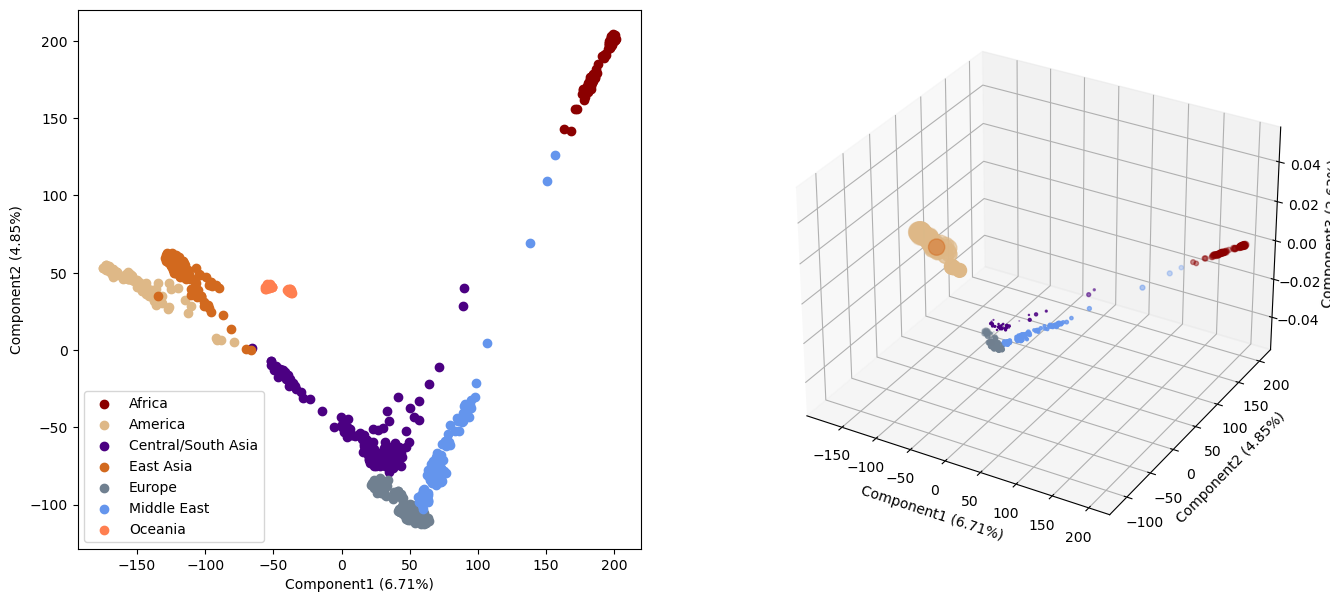

In [12]:
colors = ['darkred', 'burlywood', 'indigo', 'chocolate', 'slategrey', 'cornflowerblue', 'coral']
fig=plt.figure(figsize=(16, 7),dpi=100)
ax=fig.add_subplot(121)
for i, c, label in zip(regions, colors, regions):
    ax.scatter(x_pca2[labels == i, 0], x_pca2[labels == i, 1], c=c, label=label)
ax.legend(loc=3)
ax.set_xlabel('Component1'+' '+'(%0.2f%%)'% (100*pca2.explained_variance_ratio_[0]))
ax.set_ylabel('Component2'+' '+'(%0.2f%%)'% (100*pca2.explained_variance_ratio_[1]))

ax=fig.add_subplot(122,projection='3d')
for i, c, label in zip(regions, colors, regions):
    plt.scatter(x_pca3[labels == i, 0], x_pca3[labels == i, 1], x_pca3[labels == i, 2], c=c, label=label)
ax.set_xlabel('Component1'+' '+'(%0.2f%%)'% (100*pca3.explained_variance_ratio_[0]))
ax.set_ylabel('Component2'+' '+'(%0.2f%%)'% (100*pca3.explained_variance_ratio_[1]))
ax.set_zlabel('Component3'+' '+'(%0.2f%%)'% (100*pca3.explained_variance_ratio_[2]))
plt.show()

In [13]:
# regions_unique = list(set(df_info['region']))
# regions_colors = [np.array([plt.cm.tab20(i)]) for i in range(len(regions_unique)) ]
# # "list" is called by () instead of []

# fig=plt.figure(figsize=(16, 7),dpi=100)
# ax=fig.add_subplot(121)
# for i, c, label in zip(regions, regions_colors, regions):
#     ax.scatter(x_pca2[labels == i, 0], x_pca2[labels == i, 1], 
#                c=regions_colors[regions_unique.index(label)], label=label)
# ax.legend(loc=3)
# ax.set_xlabel('Component1'+' '+'(%0.2f%%)'% (100*pca2.explained_variance_ratio_[0]))
# ax.set_ylabel('Component2'+' '+'(%0.2f%%)'% (100*pca2.explained_variance_ratio_[1]))

# ax=fig.add_subplot(122,projection='3d')
# for i, c, label in zip(regions, regions_colors, regions):
#     plt.scatter(x_pca3[labels == i, 0], x_pca3[labels == i, 1], x_pca3[labels == i, 2], c=c, label=label)
# ax.set_xlabel('Component1'+' '+'(%0.2f%%)'% (100*pca3.explained_variance_ratio_[0]))
# ax.set_ylabel('Component2'+' '+'(%0.2f%%)'% (100*pca3.explained_variance_ratio_[1]))
# ax.set_zlabel('Component3'+' '+'(%0.2f%%)'% (100*pca3.explained_variance_ratio_[2]))
# plt.show()


# # plt.figure(figsize=(7,6),dpi=100)
# # pc1, pc2 = x_pca2[:,0], x_pca2[:,1]
# # for i, region in enumerate(regions):
# #     plt.scatter(pc1[i], pc2[i], label=region, s=10, c=regions_colors[regions_unique.index(region)] );
# # from collections import OrderedDict
# # handles, labels = plt.gca().get_legend_handles_labels()
# # by_label = OrderedDict(zip(labels, handles))
# # plt.legend(by_label.values(), by_label.keys(), loc='lower left');



### 1.2 MDS

In [14]:
# two principal components
mds2=MDS(n_components=2)
x_mds2=mds2.fit_transform(features)

# three principal components
mds3=MDS(n_components=3)
x_mds3=mds3.fit_transform(features)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


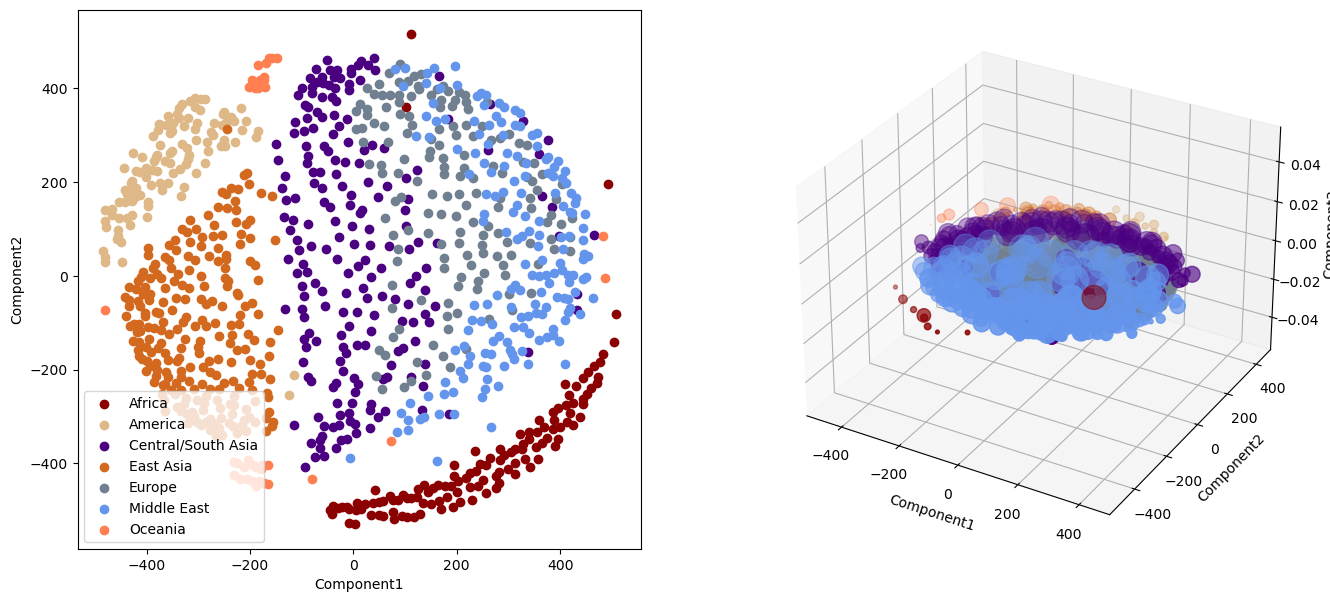

In [15]:
fig=plt.figure(figsize=(16, 7),dpi=100)
ax=fig.add_subplot(121)

for i, c, label in zip(regions, colors, regions):
    ax.scatter(x_mds2[labels == i, 0], x_mds2[labels == i, 1], c=c, label=label)
ax.legend(loc=3)
ax.set_xlabel('Component1')
ax.set_ylabel('Component2')
ax=fig.add_subplot(122,projection='3d')
for i, c, label in zip(regions, colors, regions):
    plt.scatter(x_mds3[labels == i, 0], x_mds3[labels == i, 1], x_mds3[labels == i, 2], c=c, label=label)
ax.set_xlabel('Component1')
ax.set_ylabel('Component2')
ax.set_zlabel('Component3')
plt.show()

### Part 2. 
   ### Random Projections

In [16]:
def rp_plot(data,pca_r):
    plt.figure(figsize=(8, 7),dpi=100)
    for i, c, label in zip(regions, colors, regions):
        plt.scatter(data[labels == i, 0], data[labels == i, 1], c=c, label=label)
    plt.legend(loc=3)
    plt.xlabel('Component1'+' '+'(%0.2f%%)'% (100*pca_r.explained_variance_ratio_[0]))
    plt.ylabel('Component2'+' '+'(%0.2f%%)'% (100*pca_r.explained_variance_ratio_[1]))
    plt.show()  

In [17]:
features50000=features.sample(n=50000,axis=1)
features5000=features.sample(n=5000,axis=1)
features500=features.sample(n=500,axis=1)

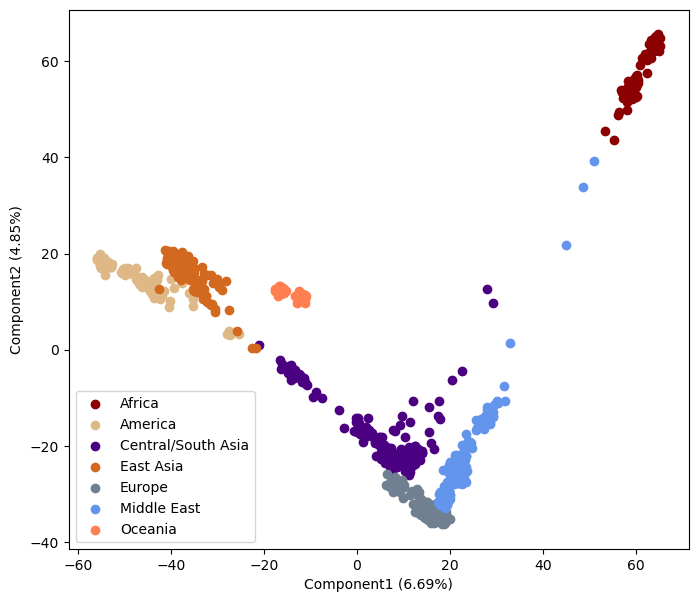

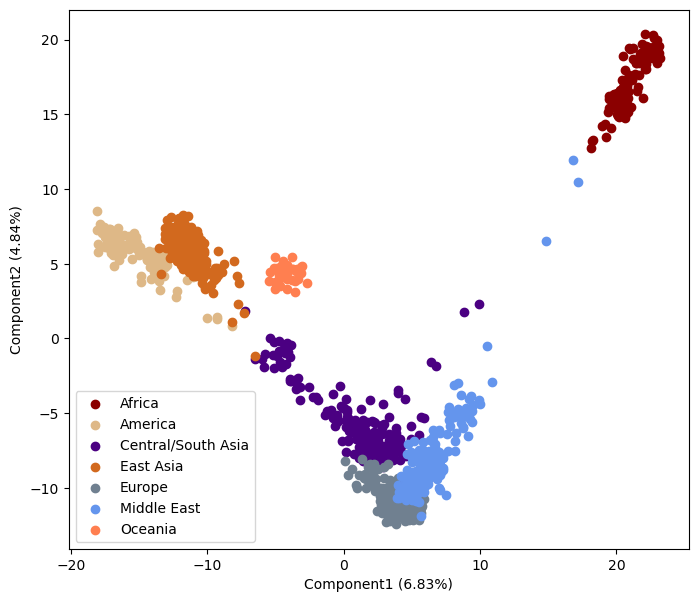

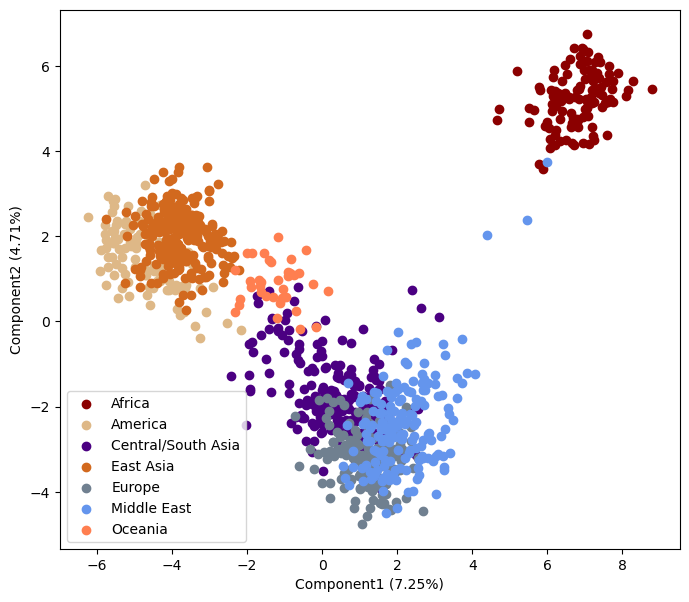

In [18]:
for projection in [features50000,features5000,features500]:
    pca_r=PCA(n_components=2)
    x_pcar=pca_r.fit_transform(projection)
    rp_plot(x_pcar,pca_r)

### Case Study

In [19]:
labels_p=df_info['Population']
labels_c=labels_p[df_info['Geographic.area']=='China']
nations=np.unique(labels_c)
n_c=len(nations)

all_colors=list(plt.cm.colors.cnames.keys())
random.seed(123) 
colors_c=random.choices(all_colors, k=n_c) 

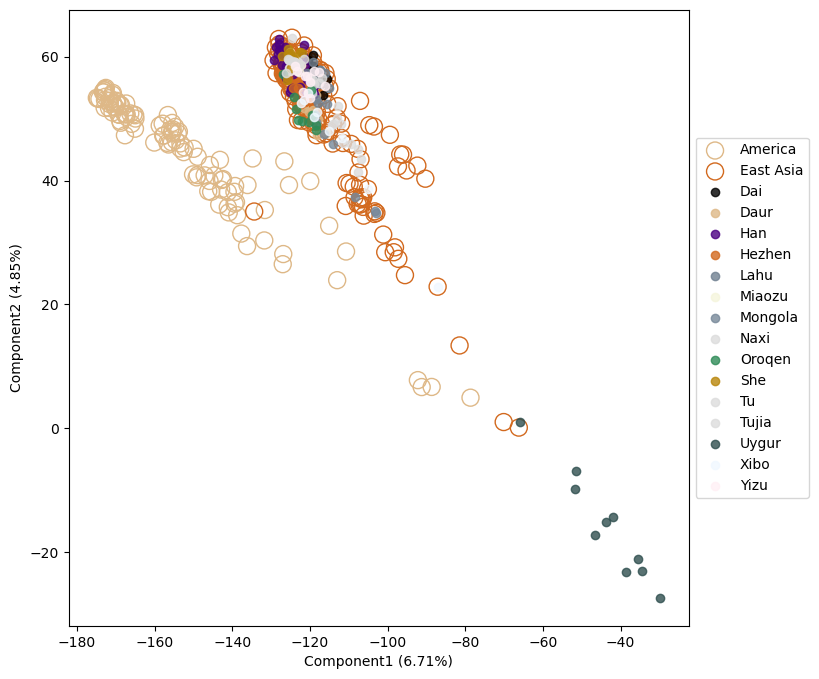

In [20]:
plt.figure(figsize=(8, 8),dpi=100)
for i, c, label in zip(regions, colors, regions):
    if label=='East Asia' or label=='America':
        plt.scatter(x_pca2[labels == i, 0], x_pca2[labels == i, 1], label=label, s=150, facecolors="None", edgecolors=c)
for i, c, label in zip(nations, colors_c, nations):
    plt.scatter(x_pca2[labels_p == i, 0], x_pca2[labels_p == i, 1], c=c, label=label, alpha=0.8)
population='Uygur'
# plt.scatter(x_pca2[labels_p == population, 0],x_pca2[labels_p == population, 1], s=200, facecolors="None", edgecolors="red")
plt.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.xlabel('Component1'+' '+'(%0.2f%%)'% (100*pca2.explained_variance_ratio_[0]))
plt.ylabel('Component2'+' '+'(%0.2f%%)'% (100*pca2.explained_variance_ratio_[1]))
plt.show()

### Part 3.
### Statistical learning methods

In [21]:
df_info['Population'].value_counts()

Palestinian       51
Bedouin           48
Druze             47
Han               44
Biaka Pygmies     32
Mozabite          30
French            29
Japanese          29
Sardinian         28
Maya              25
Sindhi            25
Russian           25
Pima              25
Burusho           25
Kalash            25
Makrani           25
Yakut             25
Balochi           25
Brahui            25
Karitiana         24
Yoruba            24
French Basque     24
Mandenka          24
Hazara            24
Pathan            23
Surui             21
Bantu             20
NAN Melanesian    19
Papuan            17
Adygei            17
Orcadian          16
Mbuti Pygmies     15
North Italian     13
Colombian         13
Cambodian         11
She               10
Tu                10
Lahu              10
Yizu              10
Dai               10
Mongola           10
Oroqen            10
Miaozu            10
Tujia             10
Uygur             10
Daur               9
Naxi               9
Hezhen       

#### Data preprocessing

In [22]:
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.examples.tutorials.mnist import input_data
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FastICA
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.random_projection import SparseRandomProjection
# import keras
# from keras.models import Sequential, Model
# from keras.layers import Dense
# from keras.optimizers import Adam

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import ExtraTreesClassifier as ETC
from sklearn.ensemble import HistGradientBoostingClassifier as HGBC
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [24]:
# large = 22; med = 16; small = 12
# params = {'axes.titlesize': large, #子图上的标题字体大小
#           'legend.fontsize': small, #图例的字体大小
#           'figure.figsize': (16, 10), #图像的画布大小
#           'axes.labelsize': med, #标签的字体大小
#           'xtick.labelsize': med, #x轴上的标尺的字体大小
#           'ytick.labelsize': med, #y轴上的标尺的字体大小
#           'figure.titlesize': large} #整个画布的标题字体大小
# plt.rcParams.update(params) #设定各种各样的默认属性,重启回归默认
# plt.style.use('classic') #设定整体风格
# plt.rcParams['font.sans-serif']=['Helvetica']#['Helvetica']  
# sns.set_style("darkgrid") #设定整体背景风格

# %matplotlib inline

In [25]:
Y_label=LabelEncoder()
Y_label=Y_label.fit_transform(labels)

In [26]:
interp=pd.concat([pd.DataFrame(Y_label),pd.DataFrame(labels)],axis=1)
interp.columns=["Number","interpretation"]
interp=interp.drop_duplicates(subset=['interpretation'],keep='first')
interp.sort_values(by=['Number'])

,Number,interpretation
0,0,Africa
753,1,America
35,2,Central/South Asia
310,3,East Asia
608,4,Europe
20,5,Middle East
604,6,Oceania


Define functions

In [27]:
def feature_import(X,y,a):
    fea_import=[*zip(features.columns,RFC(n_estimators=100,random_state=0).fit(X,y).feature_importances_)]
    fea_sort=sorted(fea_import,key = lambda x:x[1],reverse=True)
    fea_sort=pd.DataFrame(fea_sort)
    fea_sort.columns=["SNP","feature importance"]
    top_a=fea_sort.iloc[0:a,:]
    return top_a

In [28]:
def feature_import2(X,y,a):
    fea_import=[*zip(features.columns,ETC(n_estimators=100,random_state=0).fit(X,y).feature_importances_)]
    fea_sort=sorted(fea_import,key = lambda x:x[1],reverse=True)
    fea_sort=pd.DataFrame(fea_sort)
    fea_sort.columns=["SNP","feature importance"]
    top_a=fea_sort.iloc[0:a,:]
    return top_a

In [29]:
#Random forest importance
df_import=feature_import(features,Y_label,features.shape[1])
df_snp['snp'][df_import['SNP']]

235104     rs2280331
103502    rs12464018
88121     rs12032765
425826     rs7758523
157003      rs155906
             ...    
488914     rs7761056
488915     rs2081188
488916     rs2951747
488917     rs2929374
488918     rs2959523
Name: snp, Length: 488919, dtype: object

In [30]:
top5_name = np.array(df_snp['snp'][df_import['SNP']])[0:5]

top5_index=np.array(df_import['SNP'])[0:5]
top5_index

array([235104, 103502,  88121, 425826, 157003], dtype=int64)

In [31]:
df_import=feature_import2(features,Y_label,features.shape[1])
df_snp['snp'][df_import['SNP']]

345082    rs6070379
436142    rs7946201
232611     rs225121
366240    rs6723770
244439    rs2421069
            ...    
488914    rs7761056
488915    rs2081188
488916    rs2951747
488917    rs2929374
488918    rs2959523
Name: snp, Length: 488919, dtype: object

In [32]:
top5_name2 = np.array(df_snp['snp'][df_import['SNP']])[0:5]

top5_index2=np.array(df_import['SNP'])[0:5]
top5_index2

array([345082, 436142, 232611, 366240, 244439], dtype=int64)

In [33]:
X ,y = features,Y_label
d = np.array([488919,10160,7085,6504,2098,1007,944,775,663,580,547,524,512,404,300,203,104,44,8,1])

RFC_=RFC(random_state=0)
ETC_=ETC(random_state=0)
# HGBC_=HGBC(learning_rate = 0.6,random_state=0,max_iter=10,max_leaf_nodes=30,max_depth=10)
HGBC_=HGBC(learning_rate = 0.6,random_state=0)
d_s=[]

# threshold = np.linspace(0,(RFC_.fit(X,y).feature_importances_).max(),50)
#threshold = np.linspace(0,(RFC_.fit(X,y).feature_importances_).max(),100)

In [34]:
score_s = []
for i in d:
#     print(i)
    n=random.sample(range(X.shape[1]),i)
    X_embedded = X.iloc[:,n]
    d_s.append(X_embedded.shape[1])
#     print(X_embedded.shape[1])
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score_s.append(once)
#     print(once)
print(np.round(score_s,4))

[0.9616 0.9424 0.9367 0.9396 0.9012 0.8945 0.883  0.8897 0.8744 0.8926
 0.8744 0.8542 0.8609 0.8427 0.836  0.8121 0.7775 0.6827 0.325  0.3049]


In [35]:
score_e = []
for i in d:
#     print(i)
    n=random.sample(range(X.shape[1]),i)
    X_embedded = X.iloc[:,n]
    d_s.append(X_embedded.shape[1])
#     print(X_embedded.shape[1])
    once = cross_val_score(ETC_,X_embedded,y,cv=5).mean()
    score_e.append(once)
#     print(once)
print(np.round(score_e,4))

[0.9683 0.9434 0.9463 0.954  0.9147 0.9214 0.9032 0.907  0.8926 0.8792
 0.8897 0.8974 0.8686 0.8772 0.8676 0.837  0.7871 0.7114 0.3308 0.2512]


In [ ]:
score_g = []
for i in d:
#     print(i)
    n=random.sample(range(X.shape[1]),i)
    X_embedded = X.iloc[:,n]
    d_s.append(X_embedded.shape[1])
#     print(X_embedded.shape[1])
    once = cross_val_score(HGBC_,X_embedded,y,cv=5).mean()
    score_g.append(once)
#     print(once)
print(score_g)

'''
This cell will take a long time to run.
The result data is then subtracted directly, in the convenience of following computation.
'''

In [87]:
score_g = [0.48789565697460435, 0.45738406330511594, 0.47687246963562746, 0.5481367316893633, 
           0.3508695252116305, 0.45233713654766283, 0.8580833640044165, 0.36135903570114103, 
           0.36142804563857, 0.4518908722856091, 0.319262973868237, 0.30851122561648875, 
           0.27519322782480676, 0.35085572322414427, 0.5130842841369156, 0.334596981965403, 
           0.4802769598822231, 0.3739556496135443, 0.2760857563489142]

print(np.round(score_g,4))

[0.4879 0.4574 0.4769 0.5481 0.3509 0.4523 0.8581 0.3614 0.3614 0.4519
 0.3193 0.3085 0.2752 0.3509 0.5131 0.3346 0.4803 0.374  0.2761]


In [88]:
ds_com=pd.concat([pd.DataFrame(d),pd.DataFrame(score_s),pd.DataFrame(score_e),pd.DataFrame(score_g)],axis=1)

ds_com.columns=['d','RF','ET','GT']

d_index=[488919,10160,7085,6504,2098,1007,944,775,663,580,547,524,512,404,300,203,104,44,8,1]

ds_com=ds_com.loc[ds_com["d"].isin(d_index),:]

ds_com.index=range(len(ds_com["d"]))

ds_com.to_csv("predata.csv",index=None)

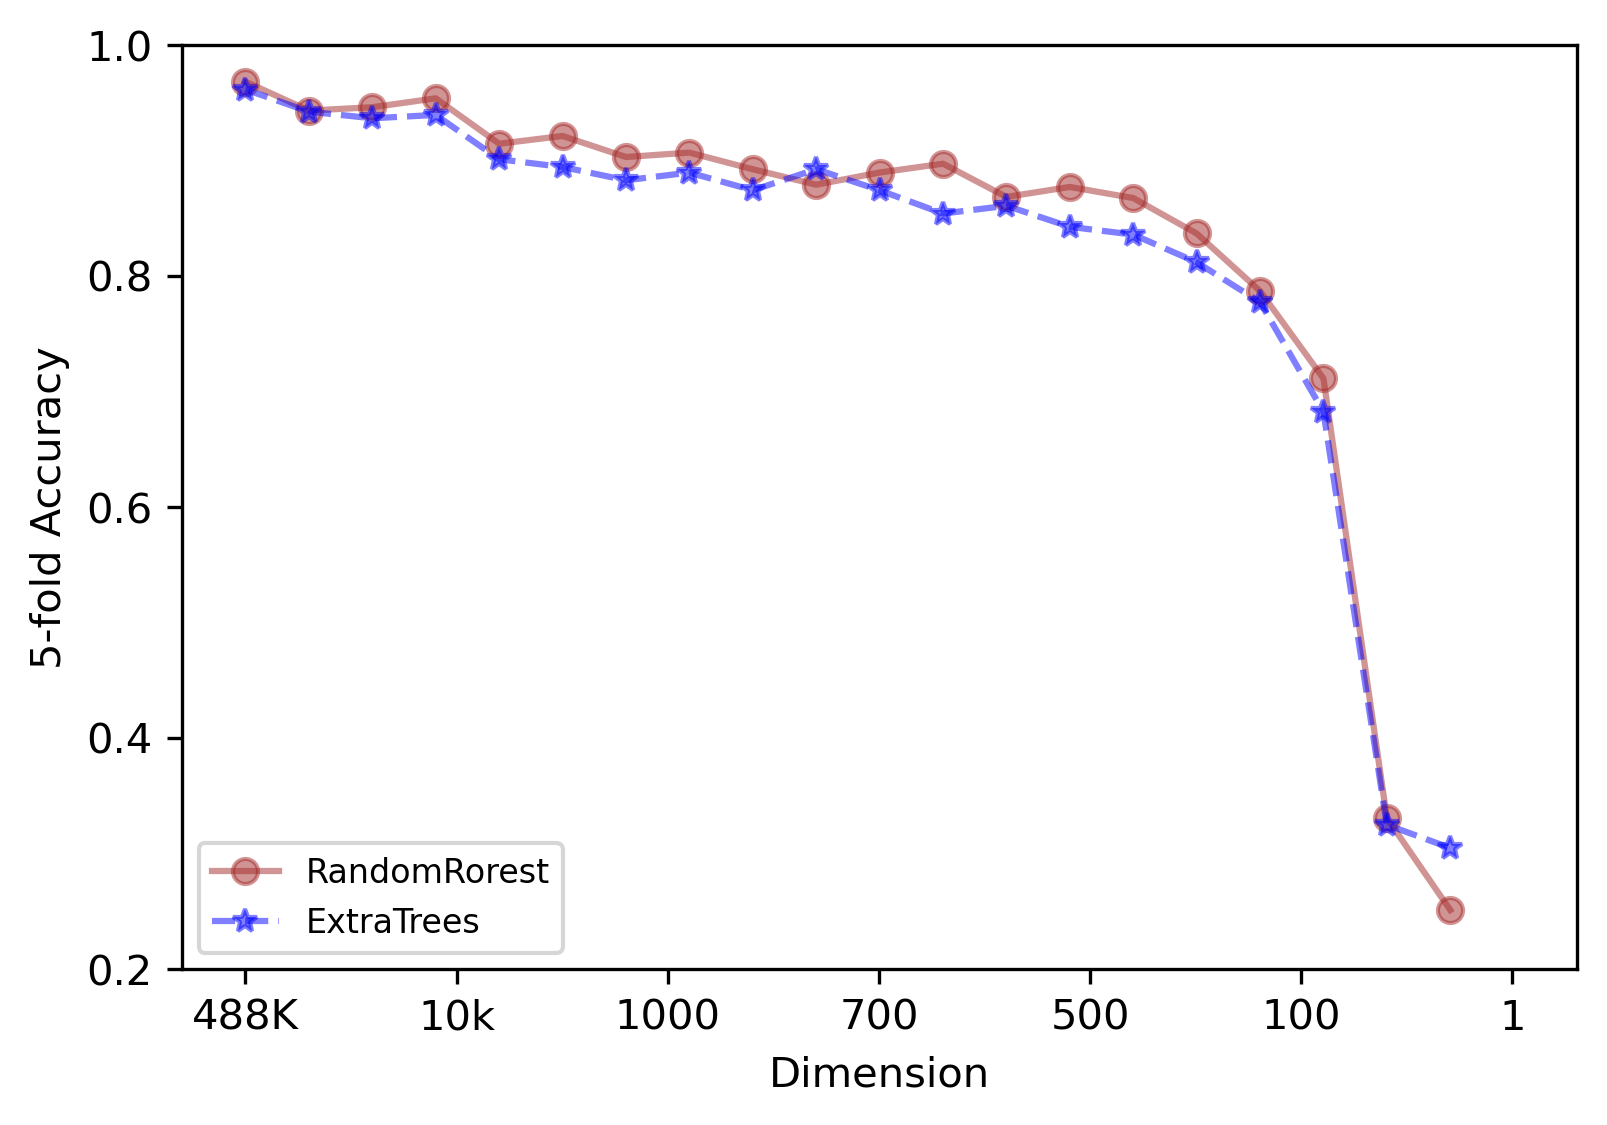

In [102]:
fig, ax = plt.subplots(figsize=(6,4), dpi= 300)

# ax.hlines(0.9050
#           , xmin=0 
#           , xmax= len(ds_com["d"])-1
#           , color='red', alpha=0.9, linewidth=1,linestyles = "dashed")
# ax.vlines(4
#           , ymin=0.2
#           , ymax=0.9050
#           , color='firebrick', alpha=0.7, linewidth=1,linestyles = "dashed")

ax.plot(range(len(ds_com["d"])), ds_com.ET, marker=r'o', color='brown',alpha=0.5, linestyle='-',label ="RandomRorest")
ax.plot(range(len(ds_com["d"])), ds_com.RF, marker=r'*', color='blue',alpha=0.5, linestyle='dashed',label ="ExtraTrees")
# ax.plot(range(len(ds_com["d"])), ds_com.GT, marker=r'D', color='red',alpha=0.5, linestyle='dashdot',label ="GBT")

# ax.plot(4,0.9050, 'ro',alpha=0.3)

#x_label=['400K','','','',
#        '100K','','','',
#        '1000','','','',
#        '100','','','',
#        '10','','','1']
x_label=['488K','10k','1000','700','500','100','1']
y_label=['0.2','0.4','0.6','0.8','1.0']
plt.xticks(np.arange(0,21,3.33), x_label)
plt.yticks(np.arange(0.2,1.2,0.2),y_label)

plt.rc('legend', fontsize=8)
ax.legend(loc = 3)
#ax.set_xticklabels(, fontdict={'horizontalalignment': 'right',"size":20})
ax.set_xlabel('Dimension',fontsize=10)
ax.set_ylabel('5-fold Accuracy',fontsize=10)
ax.set_xlim(-1,21)
ax.set_ylim(0.2,1)
plt.savefig('./fig_pred.jpg')
plt.show()

In [90]:
imp_xxx=RFC_.fit(X,y).feature_importances_
top5_imp=sorted(imp_xxx)[::-1][0:5]

imp_xxx=ETC_.fit(X,y).feature_importances_
top5_imp2=sorted(imp_xxx)[::-1][0:5]

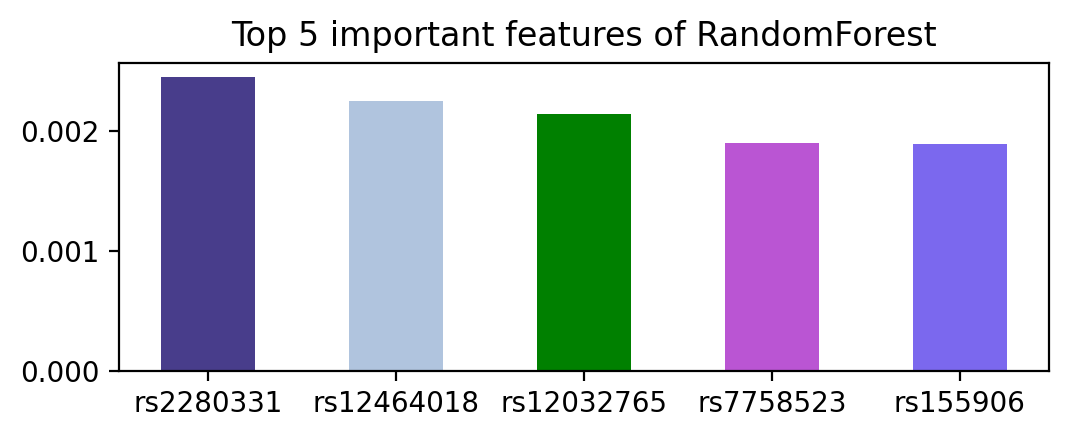

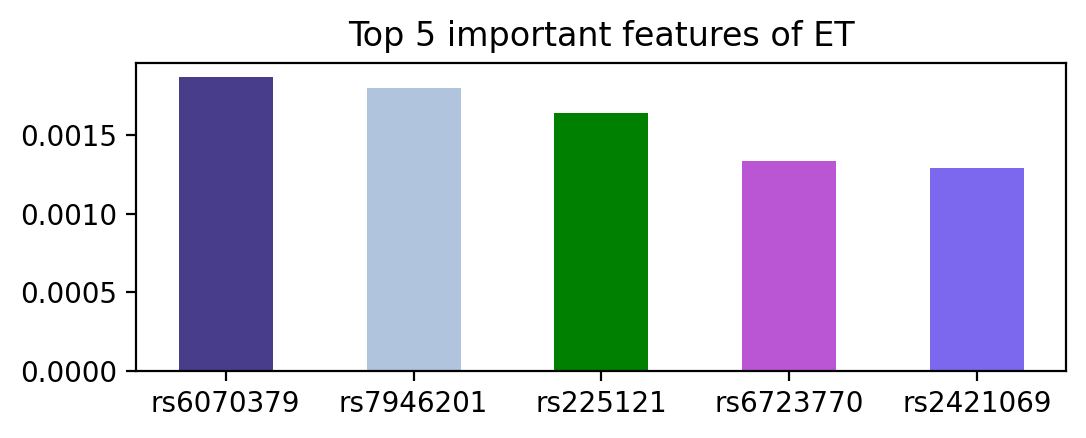

In [91]:
rand_colors = list(plt.cm.colors.cnames.keys())
random.seed(3) 
color_imp = random.choices(rand_colors, k=5) 

plt.figure(figsize=(6,2), dpi= 200)
plt.bar(top5_name, top5_imp, color=color_imp, width=.5) #width 0-1
plt.title("Top 5 important features of RandomForest", fontsize=12)
#plt.ylabel('# Vehicles')
#plt.ylim(0, 45)
plt.savefig('./fig_rf.png')
plt.show()



plt.figure(figsize=(6,2), dpi= 200)
plt.bar(top5_name2, top5_imp2, color=color_imp, width=.5) #width 0-1
plt.title("Top 5 important features of ET", fontsize=12)
#plt.ylabel('# Vehicles')
#plt.ylim(0, 45)
plt.savefig('./fig_et.png')
plt.show()

In [ ]:
one_top_feature=features[top5_index]

data_top5 = pd.concat([one_top_feature, labels], axis=1)
col_name=[]
col_name.extend(top5_name)
col_name.append('label')
data_top5.columns= col_name
data_top5.to_csv("top5_rf.csv",index=None)



one_top_feature=features[top5_index2]

data_top5 = pd.concat([one_top_feature, labels], axis=1)
col_name=[]
col_name.extend(top5_name2)
col_name.append('label')
data_top5.columns= col_name
data_top5.to_csv("top5_et.csv",index=None)

In [ ]:
one_top_feature=features[top5_index3]

data_top5 = pd.concat([one_top_feature, labels], axis=1)
col_name=[]
col_name.extend(top5_name3)
col_name.append('label')
data_top5.columns= col_name
data_top5.to_csv("top5_gbt.csv",index=None)

### Part 4.
### Case Study
Focus on the populations in China.\
Compare the populations with the neighbored areas (Japan, Siberia, Cambodia), especially for the populations around the border (Uygur, Lahu, Dai).

**Data preprocessing**

In [37]:
X = features
snp = df_snp['snp'].tolist()
popus, regions = df_info['Population'], df_info['region']

['Naxi', 'Xibo', 'Hezhen', 'Tu', 'Lahu', 'She', 'Mongola', 'Han', 'Miaozu', 'Uygur', 'Oroqen', 'Dai', 'Daur', 'Yizu', 'Tujia']

Remark: Uygur belongs to Central/South Asia. Others are in East Asia.


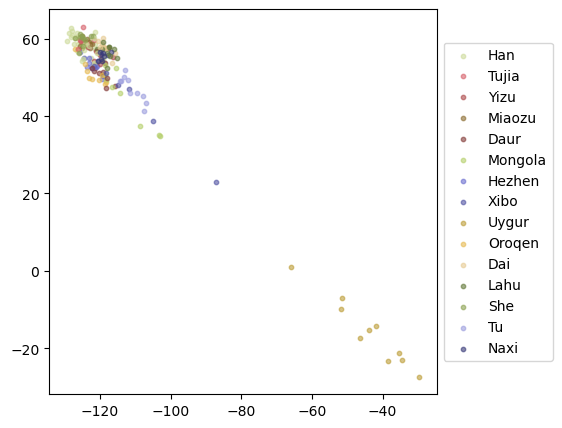

In [39]:
# populations in China:

popus_c = popus[df_info['Geographic.area']=='China']
popus_c_unique = list(set(popus_c))
popus_c_colors = [np.array([plt.cm.tab20b(i)]) for i in range(len(popus_c_unique)) ]

print(popus_c_unique)
print('\nRemark: Uygur belongs to Central/South Asia. Others are in East Asia.')


# plot populations in China
plt.figure(figsize=(5,5),dpi=100)
pc1, pc2 = x_pca2[:,0], x_pca2[:,1]
for i in popus_c.index:
    popu = popus_c[i]
    plt.scatter(pc1[i], pc2[i], label=popu, s=10, c=popus_c_colors[popus_c_unique.index(popu)],alpha=0.6 )
from collections import OrderedDict
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),  loc="center left", bbox_to_anchor=(1, 0, 0.5, 1));

### PCA on all East Asia regions
    To capture finer-scale structures among populations



[0.01775575 0.00959654]


Text(0.5, 1.0, 'PCA on East Asia data')

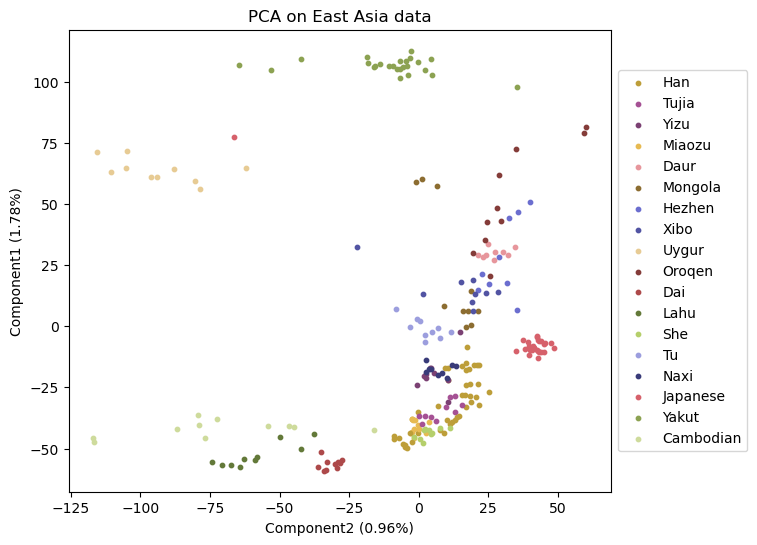

In [63]:
# popus_ea = popus[df_info['region']=='East Asia'] 
# popus_ea = pd.concat([popus[df_info['region']=='East Asia'],  popus[df_info['Population']=='Uygur']])
popus_ea2 = pd.concat([popus[df_info['Geographic.origin']=='China'],
                      popus[df_info['Geographic.origin']=='Japan'],
                      popus[df_info['Geographic.origin']=='Siberia'],
                      popus[df_info['Geographic.origin']=='Cambodia'],])


popus_ea2_unique = list(set(popus_ea2)) 
popus_colors2 = [np.array([plt.cm.tab20b(i)]) for i in range(len(popus_ea2_unique)) ]

Xea2 = np.array(X)[popus_ea2.index, :]
pca2_ea2 = PCA(n_components=2)
Xea2_pca2 = pca2_ea2.fit_transform(Xea2)
print(pca2_ea2.explained_variance_ratio_)


plt.figure(figsize=(7,6),dpi=100)
for i, i_p in enumerate(popus_ea2.index):
    popu = popus_ea2[i_p]
    plt.scatter(-Xea2_pca2[i,1], Xea2_pca2[i,0], label=popu, s=10, c=popus_colors2[popus_ea2_unique.index(popu)] )
from collections import OrderedDict
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="center left", bbox_to_anchor=(1, 0, 0.5, 1));

plt.xlabel('Component2 (%0.2f%%)' %(100*pca2_ea2.explained_variance_ratio_[1]));
plt.ylabel('Component1 (%0.2f%%)' %(100*pca2_ea2.explained_variance_ratio_[0]));
plt.title('PCA on East Asia data');

# add text (important legend) on the figure

**Components' dependence on actual SNPs**

(2, 488919)
[[-0.00793568 -0.00784282  0.00759998  0.0074995   0.00747046 -0.00744406
   0.00744239  0.00737489 -0.00734565  0.00732193 -0.00730091 -0.00724675
  -0.00724675 -0.00723914  0.00718318  0.00715771 -0.00713713  0.00713397
   0.00711558  0.00706816]
 [ 0.00825033 -0.00782095 -0.00771234 -0.00752359  0.00742453 -0.00739946
  -0.00725525 -0.00724251 -0.00723705  0.00720615  0.00720615  0.00716554
   0.00715998  0.00711525  0.0070475  -0.00704622  0.00703434 -0.00699426
   0.00698932 -0.00698932]]

top-10 PCA-correlated actual SNPs:
[[203504, 'rs1867987'], [244372, 'rs2420318'], [97077, 'rs1227009'], [315592, 'rs4698181'], [9877, 'rs10008281'], [25719, 'rs1042026'], [138672, 'rs1375469'], [286665, 'rs3789940'], [218081, 'rs2051428'], [289114, 'rs3819197']]

[[488762, 'rs595872'], [286902, 'rs3792856'], [351965, 'rs6447872'], [198999, 'rs17825455'], [218983, 'rs2060330'], [178685, 'rs17067621'], [216144, 'rs2032196'], [457894, 'rs9305956'], [238422, 'rs2309487'], [116361, 'rs127

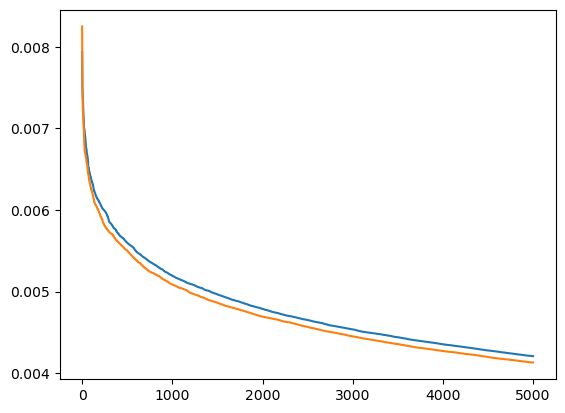

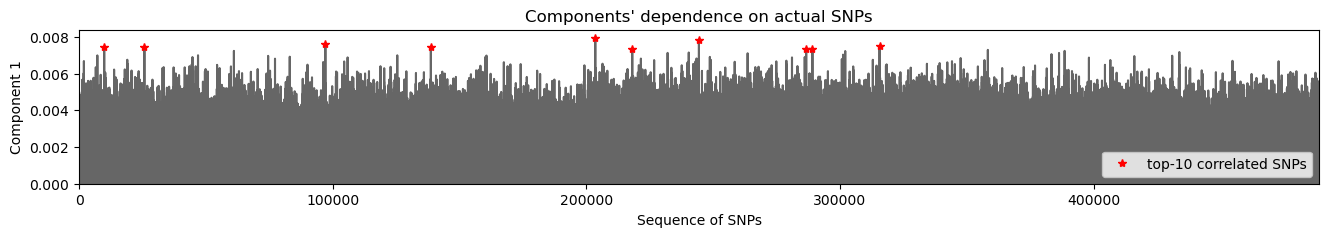

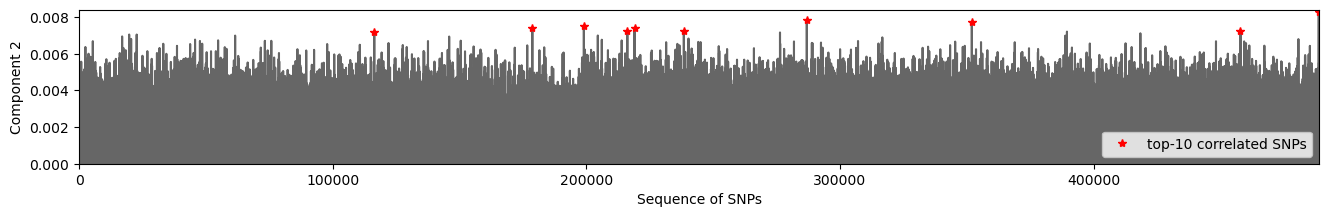

In [62]:
pc2ea_comp = pca2_ea2.components_
print(pc2ea_comp.shape)

pc2ea_comp_sort = np.zeros(pc2ea_comp.shape)
sorted_id2ea = np.zeros(pc2ea_comp.shape)
for i in range(pc2ea_comp.shape[0]):
    sorted_idea = sorted(range(pc2ea_comp.shape[1]), key=lambda k: abs(pc2ea_comp[i,k]), reverse=True)
    pc2ea_comp_sort[i] = pc2ea_comp[i,sorted_idea]
    sorted_id2ea[i] = sorted_idea
    plt.plot(abs(pc2ea_comp_sort[i,:5000]));
sorted_id2ea.astype(np.int16)
print(pc2ea_comp_sort[:,:20])


# entries of all SNPs
print('\ntop-10 PCA-correlated actual SNPs:')
for i in range(2):
    plt.figure(figsize=(16,2))
    plt.plot(range(len(snp)), abs(pc2ea_comp[i]), c='k', alpha=0.6)
    plt.plot(sorted_id2ea[i,:10], abs(pc2ea_comp_sort[i,:10]), 'r*', label='top-10 correlated SNPs')
    plt.xlabel('Sequence of SNPs')
    plt.ylabel(f'Component {i+1}')#, rotation='horizontal')
    plt.xlim(0,len(snp))
    plt.ylim(0,0.0084)
    plt.legend(loc='lower right')
    if i==0:
        plt.title('Components\' dependence on actual SNPs')
    print( [ [int(sorted_id2ea[i,j]), snp[int(sorted_id2ea[i,j])] ] for j in range(10) ] )
    print()

### projection on the top-100 PCA-correlated SNPs
    keep the population structure

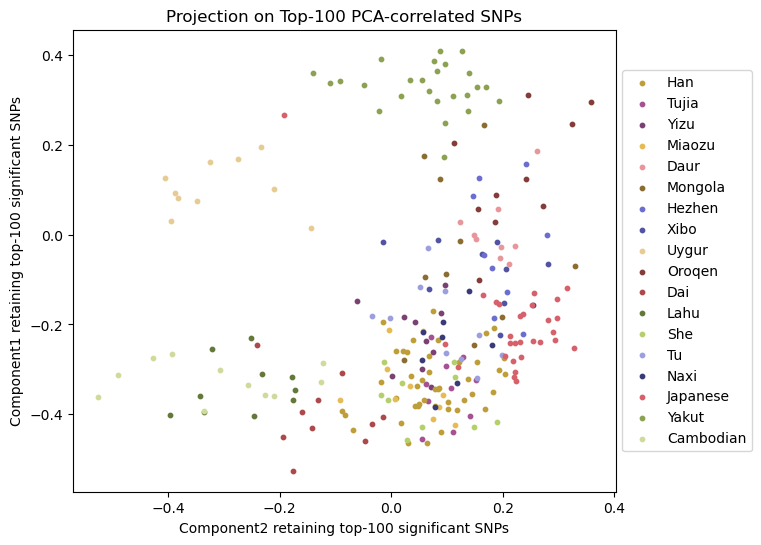

In [66]:
pc2ea_comp_main = pc2ea_comp
pc2ea_comp_main[0,sorted_id2ea[0,100:].astype(int)] = 0
pc2ea_comp_main[1,sorted_id2ea[1,100:].astype(int)] = 0
# check:
# for i in range(2):
#     plt.figure(figsize=(16,2))
#     plt.plot(range(len(snp)), abs(pc2ea_comp_main[i]), c='k', alpha=0.5)
#     plt.plot(sorted_id2ea[i,:10], abs(pc2ea_comp_sort[i,:10]), 'r*')


# projection
proj_ea2 = np.dot(Xea2, pc2ea_comp_main.T)  # new coordinates on pc1 pc2

# plot on pc1-pc2 with main snps
plt.figure(figsize=(7,6),dpi=100)
for i, i_p in enumerate(popus_ea2.index):
    popu = popus_ea2[i_p]
    plt.scatter(-proj_ea2[i,1], proj_ea2[i,0], label=popu, s=10, c=popus_colors2[popus_ea2_unique.index(popu)] )
from collections import OrderedDict
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="center left", bbox_to_anchor=(1, 0, 0.5, 1));

plt.xlabel('Component2 retaining top-100 significant SNPs');
plt.ylabel('Component1 retaining top-100 significant SNPs');
plt.title('Projection on Top-100 PCA-correlated SNPs');

### compare with random-100 SNPs

Text(0.5, 1.0, 'Projection on Random-100 SNPs')

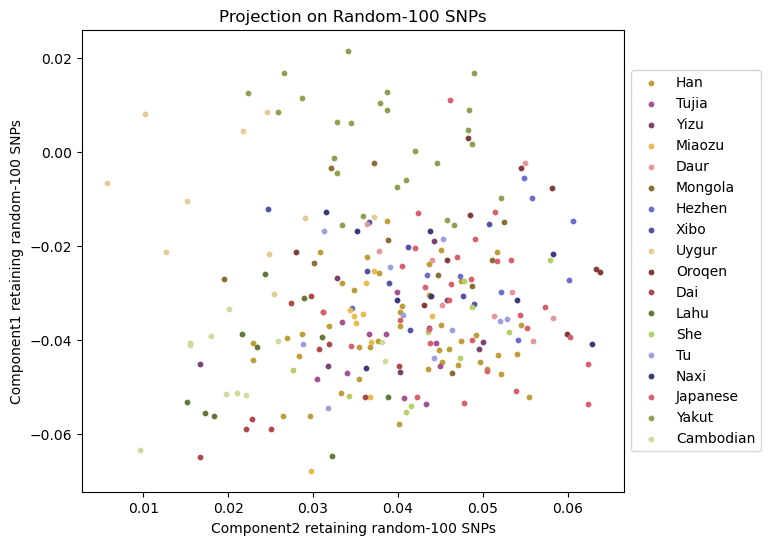

In [65]:
pc2ea_comp_random = np.zeros(pc2ea_comp.shape)
rand_index = random.sample(range(len(snp)), 100)
pc2ea_comp_random[0, rand_index] = pc2ea_comp[0, rand_index]
rand_index = random.sample(range(len(snp)), 100)
pc2ea_comp_random[1, rand_index] = pc2ea_comp[1, rand_index]
# check:
# for i in range(2):
#     plt.figure(figsize=(16,2))
#     plt.plot(range(len(snp)), abs(pc2ea_comp_random[i]), c='k', alpha=0.5)


# projection
proj_ea2 = np.dot(Xea2, pc2ea_comp_random.T)  # new coordinates on pc1 pc2


# plot on pc1-pc2 with main snps
plt.figure(figsize=(7,6),dpi=100)
for i, i_p in enumerate(popus_ea2.index):
    popu = popus_ea2[i_p]
    plt.scatter(-proj_ea2[i,1], proj_ea2[i,0], label=popu, s=10, c=popus_colors2[popus_ea2_unique.index(popu)] )
from collections import OrderedDict
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="center left", bbox_to_anchor=(1, 0, 0.5, 1));

plt.xlabel('Component2 retaining random-100 SNPs');
plt.ylabel('Component1 retaining random-100 SNPs');
plt.title('Projection on Random-100 SNPs');

### Supplementary (of Case Study)
    (Not covered in the poster)
- **PCA on China,\
  then project other regions in East Asia onto these two componets**.

- Results can be seen: **Lahu and Uygur are prominently seperated from others in PC1 and PC2.**

[0.01553451 0.0111201 ]


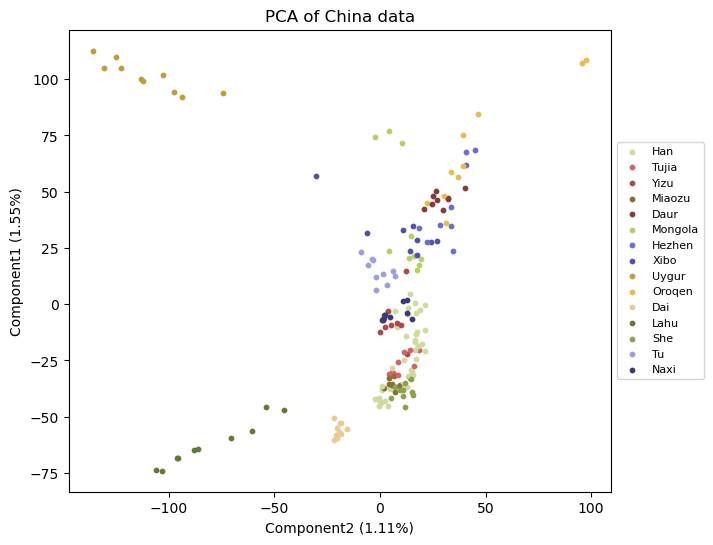

In [100]:
popus_c = popus[df_info['Geographic.area']=='China']
popus_c_unique = list(set(popus_c))
popus_c_colors = [np.array([plt.cm.tab20b(i)]) for i in range(len(popus_c_unique)) ]

Xc = np.array(X)[popus_c.index, :]

# PCA
pca2_c = PCA(n_components=2)
Xc_pca2 = pca2_c.fit_transform(Xc)
print(pca2_c.explained_variance_ratio_)


# PC1-PC2 plot
plt.figure(figsize=(7,6),dpi=100)

for i, i_p in enumerate(popus_c.index):
    popu = popus_c[i_p]
    plt.scatter(-Xc_pca2[i,1], Xc_pca2[i,0], label=popu, s=10, c=popus_c_colors[popus_c_unique.index(popu)] )
from collections import OrderedDict
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="center left", bbox_to_anchor=(1, 0, 0.5, 1));

plt.xlabel('Component2 (%0.2f%%)' %(100*pca2_c.explained_variance_ratio_[1]));
plt.ylabel('Component1 (%0.2f%%)' %(100*pca2_c.explained_variance_ratio_[0]));
plt.title('PCA of China data');

**But the projections of other regions in East Asia did not fit well by these two components.**

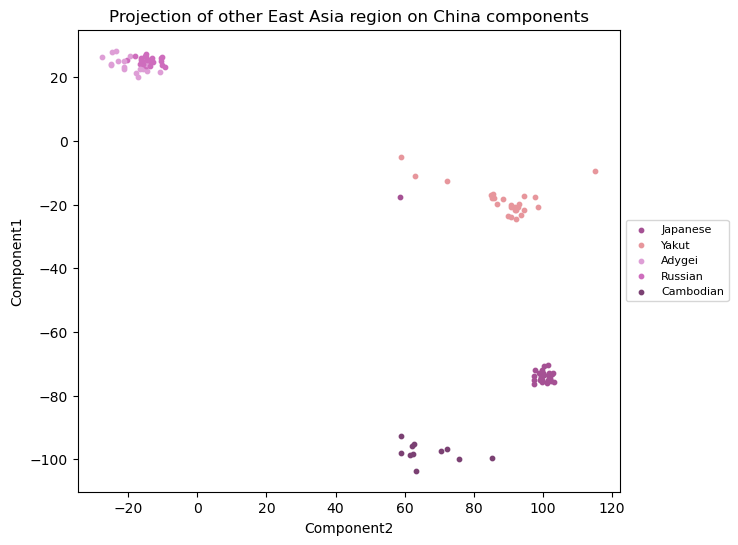

In [99]:
# East Asia data:
# popus_ea = pd.concat([popus[df_info['region']=='East Asia'],  popus[df_info['Population']=='Uygur']])
popus_ea = pd.concat([popus[df_info['Geographic.area']=='Japan'],
                      popus[df_info['Geographic.area']=='Russia'],
                      popus[df_info['Geographic.area']=='Southeast Asia'] ])
popus_ea_unique = list(set(popus_ea)) 
Xea = np.array(X)[popus_ea.index, :]


# project East Asia data on the two components above
pc2_comp = pca2_c.components_
proj_ea = np.dot(Xea, pc2_comp.T)
popus_colors = [np.array([plt.cm.tab20b(i)]) for i in range(len(popus_ea_unique)+len(popus_c_unique)) ]

plt.figure(figsize=(7,6),dpi=100)
for i, i_p in enumerate(popus_ea.index):
    popu = popus_ea[i_p]
    plt.scatter(-proj_ea[i,1], proj_ea[i,0], label=popu, s=10, 
                c=popus_colors[popus_ea_unique.index(popu)+len(popus_c_unique)] )
from collections import OrderedDict
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="center left", bbox_to_anchor=(1, 0, 0.5, 1));

plt.xlabel('Component2');
plt.ylabel('Component1');
plt.title('Projection of other East Asia region on China components');

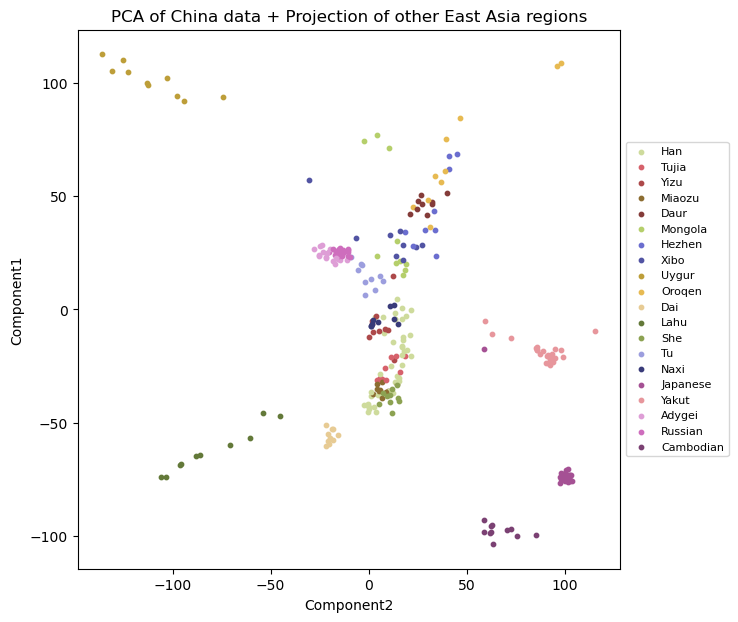

In [101]:
pc2_comp = pca2_c.components_

# popus_ea = pd.concat([popus[df_info['region']=='East Asia'],  popus[df_info['Population']=='Uygur']])
popus_ea = pd.concat([popus[df_info['Geographic.area']=='Japan'],
                      popus[df_info['Geographic.area']=='Russia'],
                      popus[df_info['Geographic.area']=='Southeast Asia'] ])
popus_ea_unique = list(set(popus_ea)) 
Xea = np.array(X)[popus_ea.index, :]

proj_ea = np.dot(Xea, pc2_comp.T)
popus_colors = [np.array([plt.cm.tab20b(i)]) for i in range(len(popus_ea_unique)+len(popus_c_unique)) ]

plt.figure(figsize=(7,7),dpi=100)
for i, i_p in enumerate(popus_c.index):
    popu = popus_c[i_p]
    plt.scatter(-Xc_pca2[i,1], Xc_pca2[i,0], label=popu, s=10, 
                c=popus_colors[popus_c_unique.index(popu)] )
for i, i_p in enumerate(popus_ea.index):
    popu = popus_ea[i_p]
    plt.scatter(-proj_ea[i,1], proj_ea[i,0], label=popu, s=10, 
                c=popus_colors[popus_ea_unique.index(popu)+len(popus_c_unique)] )
    
from collections import OrderedDict
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="center left", bbox_to_anchor=(1, 0, 0.5, 1));

plt.xlabel('Component2');
plt.ylabel('Component1');
plt.title('PCA of China data + Projection of other East Asia regions');